<a href="https://colab.research.google.com/github/minerva-spring-pds/KaggleTitanicChallenge/blob/preprocessing-exploratory-data/Titanic_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
import numpy as np 
import functools


In [0]:
def get_data():
  !mkdir .kaggle

  os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"
  token = {"username":"ddyachkova","key":"64a3cdfda8f4b415288b926b68d0f4d6"}
  with open("/content/.kaggle/kaggle.json", 'w') as file:
      json.dump(token, file)

  !cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
  !kaggle config set -n path -v{/content}
  !chmod 600 /root/.kaggle/kaggle.json
  !kaggle competitions download -c titanic -p /content

  train = pd.read_csv('train.csv')
  test = pd.read_csv('test.csv')
  gender_submission = pd.read_csv('gender_submission.csv')
  return train, test, gender_submission

In [0]:
%%capture  --no-display

train, test, gender_submission = get_data()

In [159]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [0]:
# dropping the Cabin column because most of the values are NaN values
# Potentiall will drop Name and Ticket after exploring what value it may have
train = train.drop(['Cabin'], axis = 1)

In [0]:
# these remove all NaN values
# train = train.dropna(axis = 0)
# test = test.dropna(axis = 0)

In [0]:
#encoding Sex with 1 = Female and 0 = male 
from sklearn.preprocessing import OneHotEncoder
def encoding(series):
  ohe = OneHotEncoder()
  #ohe.fit(df)
  df_enc = ohe.fit_transform(df)
  return df_enc

In [0]:
encoding(np.array(test['Embarked']).reshape(-1, 1))

<418x3 sparse matrix of type '<class 'numpy.float64'>'
	with 418 stored elements in Compressed Sparse Row format>

In [0]:
#encoding Sex with 1 = Female and 0 = male 
def sex_encoding(data):
  if data == 'male':
    return 0
  elif data == 'female':
    return 1

gender_col = map(sex_encoding, train['Sex'])
gender_enc = list(gender_col)
print(gender_enc)

[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 

In [0]:
#encoding Embarked with 0 = C (Cherbourg), 1 = Q (Queenstown), 2 = S (Southampton)
def embark_encoding(data):
  if data == 'C':
    return 0
  elif data == 'Q':
    return 1
  elif data == 'S':
    return 2
  else:
    return data # for NaN values

embark_col = map(embark_encoding, train['Embarked'])
embark_col = list(embark_col)
print(list(embark_col))

[2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, nan, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2

**Alternative encoding**

In [168]:
# drop NaN values in embarked
train = train[pd.notnull(train['Embarked'])]
print(train.count())

# enecoding
sex_encoding_dict = {'male': 0, 'female': 1}
embarked_encoding_dict = {'C': 0, 'Q': 1, 'S':2}

encoding = lambda col, x : col[x]
train['Sex_enc'] = train['Sex'].apply(functools.partial(encoding, sex_encoding_dict))
train['Embarked_enc'] = train['Embarked'].apply(functools.partial(encoding, embarked_encoding_dict))

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            712
SibSp          889
Parch          889
Ticket         889
Fare           889
Embarked       889
Sex_enc        889
dtype: int64


In [169]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_enc,Embarked_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,2


In [0]:
#train['Embarked_enc'] = embark_col

In [0]:
#train['Sex_enc'] = list(gender_enc)

In [170]:
# separate name into title and surname only

# function which keeps only the surname and title
def surname_title(data):
  return data.split(".")[0]

# column of only surname and title
surTitle_col = map(surname_title, train["Name"])
surTitle_col = list(surTitle_col)
print(surTitle_col[:5])

['Braund, Mr', 'Cumings, Mrs', 'Heikkinen, Miss', 'Futrelle, Mrs', 'Allen, Mr']


In [171]:
# two new columns for title and surname
# function for surname
def surname(data):
  return data.split(",")[0]

def title(data):
  return data.split(",")[1]

surname_col = map(surname, surTitle_col)
surname_col = list(surname_col)

title_col = map(title, surTitle_col)
title_col = list(title_col)

print(surname_col[:5])
print(title_col[:5])

['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen']
[' Mr', ' Mrs', ' Miss', ' Mrs', ' Mr']


In [172]:
# add columns back to data and drop name
train["Surname"] = surname_col
train["Title"] = title_col

train = train.drop(['Name'], axis = 1)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_enc,Embarked_enc,Surname,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,2,Braund,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,0,Cumings,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,2,Heikkinen,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1,2,Futrelle,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,2,Allen,Mr


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


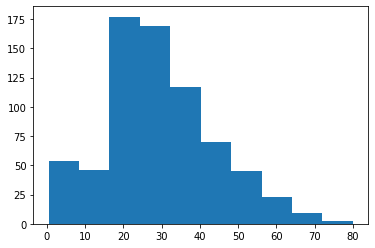

In [173]:
# this shows that kid ages were recorded
plt.hist(train["Age"])
plt.show()

In [174]:
# producing a table of only the values that have NaN for age
# again we can see Mrs titles which prove that the unrecorded ages are not all kids
age_null = pd.isnull(train["Age"])

train[age_null]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_enc,Embarked_enc,Surname,Title
5,6,0,3,male,NaN,0,0,330877,8.4583,Q,0,1,Moran,Mr
17,18,1,2,male,NaN,0,0,244373,13.0000,S,0,2,Williams,Mr
19,20,1,3,female,NaN,0,0,2649,7.2250,C,1,0,Masselmani,Mrs
26,27,0,3,male,NaN,0,0,2631,7.2250,C,0,0,Emir,Mr
28,29,1,3,female,NaN,0,0,330959,7.8792,Q,1,1,O'Dwyer,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,NaN,0,0,2629,7.2292,C,0,0,Razi,Mr
863,864,0,3,female,NaN,8,2,CA. 2343,69.5500,S,1,2,Sage,Miss
868,869,0,3,male,NaN,0,0,345777,9.5000,S,0,2,van Melkebeke,Mr
878,879,0,3,male,NaN,0,0,349217,7.8958,S,0,2,Laleff,Mr


In [0]:
train_zero_age = train.fillna({'Age' : 0.0})
train_zero_age = train_zero_age[train_zero_age['Age'] == 0.0]

From the ratios below, we can infer presence or absence of correlation. 

In [0]:
def show_ratios(df, col_name):
  df_vals = pd.DataFrame(df[col_name].value_counts())
  df_vals['Ratios'] = df_vals[col_name]/ df_vals[col_name].sum()
  return df_vals

In [177]:
show_ratios(train_zero_age, 'Embarked')

,Embarked,Ratios
S,90,0.508475
Q,49,0.276836
C,38,0.214689


In [178]:
show_ratios(train_zero_age, 'Pclass')

,Pclass,Ratios
3,136,0.768362
1,30,0.169492
2,11,0.062147


We then plot the correlation. 
The result suggests that there is correlation between the missing age values and the class - a lot of passengers from the first class have missing data for their age.

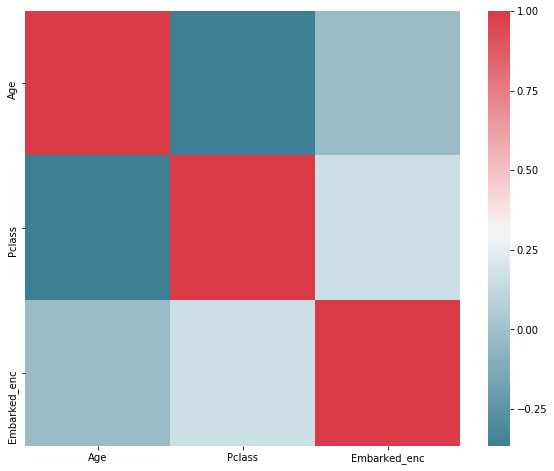

In [179]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train[['Age', 'Pclass', 'Embarked_enc']].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


Therefore, we recommend that we keep the missing values as Missing Values since they might provide more information for prediction. Now we just need to decide in what format to keep them in the age column.